,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


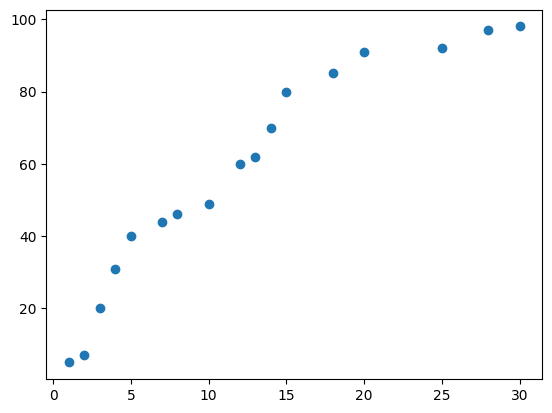

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

display(df.head())

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])

plt.show()

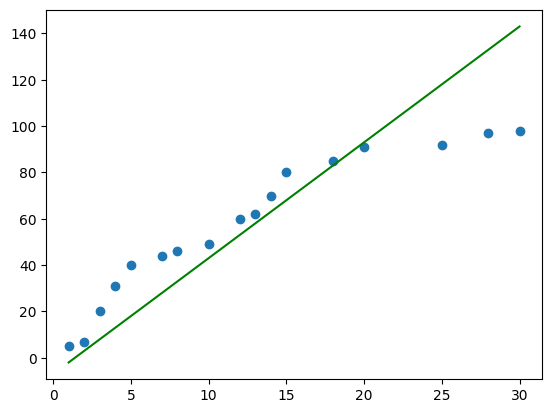

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])

# y = ax + b 직선의 그래프를 그려보아요!
# 독립변수가 1개이기 때문에 이 직선은 결국 우리의 회귀모델이 되요!

plt.plot(df['공부시간(x)'], 5 * df['공부시간(x)'] - 7, color='g')

plt.show()

In [4]:
# Tensorflow Keras를 이용해서
# Simple Linear Regression을 구현해보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
# Flatten이 input layer의 역할
# Dense는 output layer의 역할을 수행
from tensorflow.keras.optimizers import SGD
# optimizer는 w와 b를 update하기 위한 알고리즘을 가지고 있는
# 객체를 지칭.

In [ ]:
# Training Data Set부터 준비
# 당연히 2차원 matrix로 표현해야 해요!
# x_data라는 이름으로 feature(독립변수)를 표현할꺼예요!
# t_data라는 이름으로 target(종속변수)을 표현할꺼예요!
x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)  # 5개의 row, 1 feature
t_data = np.array([3, 5, 7, 9, 11]).reshape(5,1)

# Model 구현
model = Sequential()   # Model box가 생성되요!

# layer를 추가
# input layer
model.add(Flatten(input_shape=(1,)))
# output layer
model.add(Dense(units=1, activation='linear'))

# 모델이 완성되었으니 이제 모델 학습을 위한 설정을 잡아보아요!
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse')

# 모델 학습을 위한 설정이 다 됬으면 이제 학습을 시켜보아요!
model.fit(x_data,
          t_data,
          epochs=5000,
          verbose=1)


In [6]:
# 학습이 종료되면 우리 모델이 완성되요!
# 학습이 진행될 동안 우리가 눈여겨봐야하는건..
# epoch이 반복될수록 loss값은 당연히 작아져야 되요!
# 아무튼...이렇게 학습이 종료되면
# 이제 예측작업을 할 수 있어요(Prediction)

# 모델에 내가 알고싶은 독립변수의 값을 입력해서
# 그 결과(모델의 예측값)을 결과로 알아낼 수 있어요!
result = model.predict(np.array([[7]]))
print(result)


1/1 [==============================] - 0s 72ms/step
[[15.000019]]


In [8]:
# 위에서 살펴본것처럼..
# Tensorflow Keras를 이용해서 구현할 수 있지만
# 일반사람들은 이런 방식은 구현은 사실 쉽지 않아요!

# 쉽게 머신러닝 모델을 만들고 학습과 예측을 할 수 있도록
# 도와주는 library들이 있어요!
# 가장 대표적인 library가 scikit-learn이라는 라이브러리예요!

# 방금했던 작업을 이번에는 scikit-learn으로 구현해 보아요!

import numpy as np
from sklearn import linear_model

x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)  # 5개의 row, 1 feature
t_data = np.array([3, 5, 7, 9, 11]).reshape(5,1)

# 모델을 만들어요!
sklearn_model = linear_model.LinearRegression()

# 모델이 만들어졌으니.. 학습을 진행해 보아요!
sklearn_model.fit(x_data,
                  t_data)

# 학습이 끝나면 예측을 실행해요!
print(sklearn_model.predict([[7]]))  # [[15.]]




[[15.]]


In [ ]:
# 아하..sklearn은 정답에 가까운 모델을 만들고
# 예측값을 알려줘요!

# 그래서 우리가 tensorflow keras로 만든 모델이 잘 만든 모델인지
# 아니면 잘 못 만든 모델인지 확인하는 용도로 이 sklearn을
# 이용할꺼예요!

# 이번에는 실 데이터를 가지고 Simple Linear Regression을
# tensorflow Keras와 sklearn으로 구현해 보아요!

# 사용하는데이터는 Ozone데이터예요!
# 데이터는 카톡으로 드릴꺼예요!


In [18]:
import numpy as np
import pandas as pd

# Raw Data Loading
ori_data = pd.read_csv('/content/drive/MyDrive/[빅데이터 과정 공유폴더]/data/ozone/ozone.csv')
# display(ori_data.head())

df = ori_data[['Temp', 'Ozone']]
# display(df.head())

# 데이터 전처리부터 진행해야 해요!
# 데이터 전처리의 시작은 당연히 NaN이라고 되어 있는 결측치를 처리
# df.info()
# Ozone이라는 종속변수(target)에 결측치가 다수 존재해요!
# 결측치 처리는 2가지 방식으로 처리해요!
# 1. 삭제 => 데이터가 충분할 경우 삭제가 좋아요!
# 2. 수정(적절한 값으로) => 가짜데이터를 사용하는거이기 때문에 이건 더
#                           위험할수있어요!
# 우리는 그냥 냅다 삭제할 꺼예요!
df = df.dropna(how='any')
# display(df.head())
# df.info()

# 데이터 전처리는 이 상태에서 더 해야 하는데 일단 요기까지 하고
# 바로 머신러닝쪽으로 넘어가도록 해요!

# Training Data Set
# df['Temp'] 하면 1차원 Series가 나오고 values를 이용하면
# 1차원 ndarray가 나와요..shape을 살펴보면 (116,) 이렇게 되요!
# 머신러닝 입력으로 사용하려면 당연히 2차원으로 표현해야 되요!
# (116,1) 이렇게 표현해야 되요!(우리는 독립변수가 1개예요.)
# (116,)  => (-1,1) => (116,1)
x_data = df['Temp'].values.reshape(-1,1)  # 2차원으로 x_data 준비
t_data = df['Ozone'].values.reshape(-1,1)  # 2차원으로 t_data 준비

# import matplotlib.pyplot as plt

# plt.scatter(df['Temp'].values, df['Ozone'].values)
# plt.show()


In [ ]:
# Model 구현과 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))
keras_model.add(Dense(units=1, activation='linear'))

keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                    loss='mse')

keras_model.fit(x_data,
                t_data,
                epochs=2000,
                verbose=1)


In [ ]:
print(keras_model.predict([[62]]))
# Temp가 62일때 Ozoen량의 예측값은 [[42.523224]]
# 맞는 결과인지 아닌지 몰라요.. 그걸 확인하기 위해 sklearn으로
# 구현해 그 결과와 비교해볼꺼예요!

In [21]:
from sklearn import linear_model

sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data, t_data)

print(sklearn_model.predict([[62]]))  # [[3.58411393]]

[[3.58411393]]


In [ ]:
# 이렇게 데이터만 다르게해서 모델을 구현해서 학습 후
# 예측한 결과가 다르게 나왔어요!!

# 어떠한 점에서 문제가 발생했을까요??
